# Titanic - Machine Learning from Disaster

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
titanic_file_path = '../data/titanic/train.csv'

In [4]:
df = pd.read_csv(titanic_file_path) 

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Аналіз категоріальних даних

Змінні бувають категоріальні і кількісні. Подивимося які є змінні в наборі даних Титаніку

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Категоріальними змінними є Name, Sex, Ticket, Cabin, Embarked - зайшов на борт якщо опиратися тільки на цю табличку.
В реальності ж Ticket і Name не є категоріальними, тому що вони унікальні і по одній одиниці.

#### Критерії категоріальності
- Кількість унікальних значень мала (≤10–15)
- Значення мають сенс як класи (стать, клас, регіон, порт)
- Значення не виглядають як ID/імена/коди - їх взагалі можна відкинути

Дійсно категоріальні змінні можна знайти наступним скриптом - порахувати унікальні значення і відфільтрувати ті що більші за 15

In [8]:
output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique'])

for col in df:
        if df[col].nunique() <= 15:
            output_df.loc[col] = [df[col].count(),           # Count
                                  df[col].isnull().sum(),  # Missing 
                                  df[col].nunique()]        # Unique]

output_df

,Count,Missing,Unique
Survived,891,0,2
Pclass,891,0,3
Sex,891,0,2
SibSp,891,0,7
Parch,891,0,7
Embarked,889,2,3


**Survived** - 0 = No, 1 = Yes

**Pclass** - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

**Sex** - F, M

**SibSp** - # of siblings / spouses aboard the Titanic	

**Parch** - # of parents / children aboard the Titanic

**Embarked** - Port C = Cherbourg, Q = Queenstown, S = Southampton

## Частотні таблиці однієї змінної

### 1. Survived

In [9]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

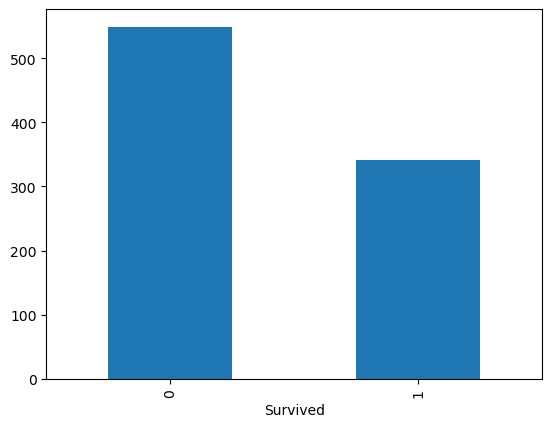

In [10]:
df['Survived'].value_counts().plot(kind='bar')

З 891 пасажирів вижило 342, 542 - загинули

### 2. PClass

In [11]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

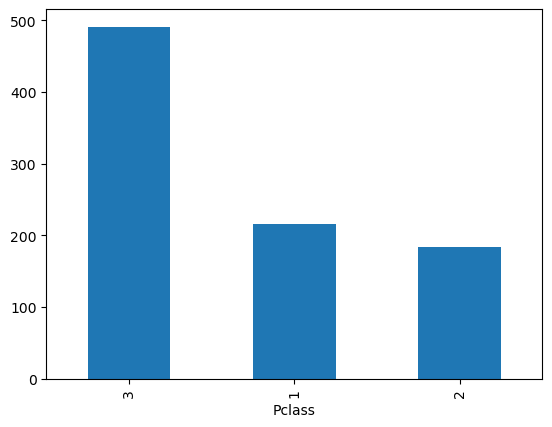

In [12]:
df['Pclass'].value_counts().plot(kind='bar')

На борту було 491 пасажир з 3-го класу, 216 пасажирів - 2-го класу, 184 пасажира - 1-го класу

### 3. Sex

In [13]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

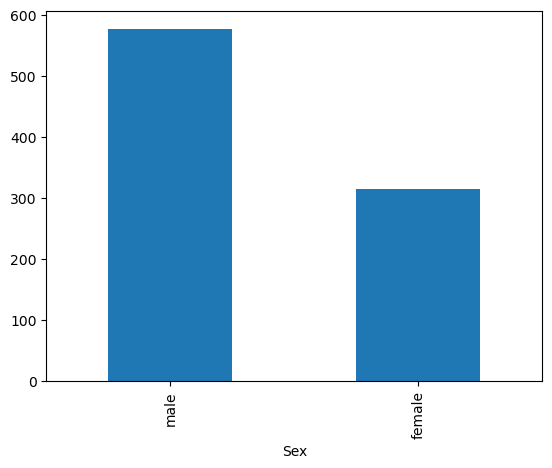

In [14]:
df['Sex'].value_counts().plot(kind='bar')

На борту було 577 чоловіків і 314 жінок

### 4. SibSp

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

In [15]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

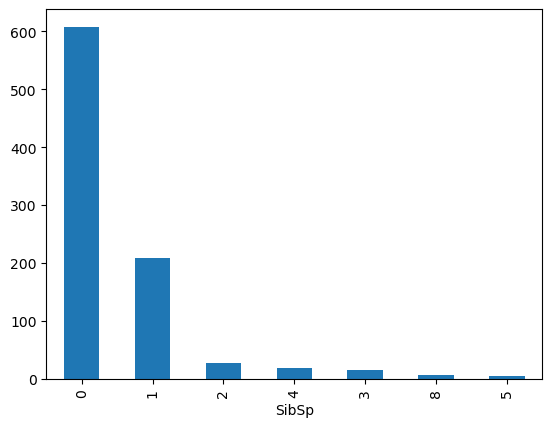

In [16]:
df['SibSp'].value_counts().plot(kind='bar')

Найбільше пасажирів було без родичей - 608 людей, 209 - заміжні пари, і далі вже люди які мали родичей

Тут детальніший аналіз як це можна буде використати https://www.kaggle.com/code/ailuropus/extracting-family-relationships-on-titanic-sibsp 

### 5. Parch

In [17]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

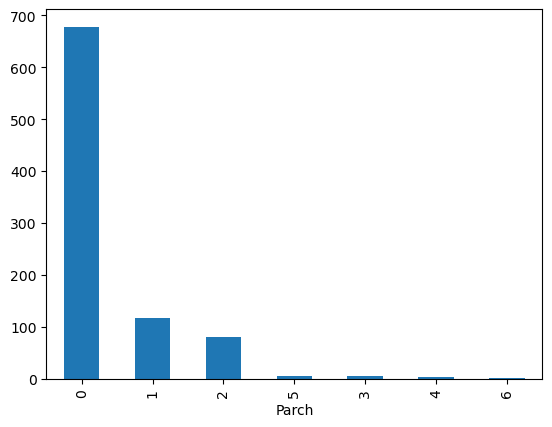

In [18]:
df['Parch'].value_counts().plot(kind='bar')

Тут я не зовсім зрозуміла як це рахується. Чи входить в 2 - дитина, чоловік і жінка. Тому вирішила глянути в датасеті у кого є такі цифри
Так як 6 має всього одна людина - її буде просто знайти.

In [19]:
df[df['Parch'] == 6][['Name', 'Age']]

,Name,Age
678,"Goodwin, Mrs. Frederick (Augusta Tyler)",43.0


Тут я очікувала що їх буде більше. Тобто батьки і діти будуть мати одну і ту саму цифру, але виявилося..

In [20]:
df[df['Name'].str.contains('Goodwin', case=False, na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


Parch - це скільки дітей всього має певна людина + себе.
А діти між собою обʼєднані кількістю SibSp.

### 6. Embarked

In [22]:
embarked = df['Embarked'].value_counts()

In [23]:
type(embarked)

pandas.core.series.Series

In [24]:
embarked

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

C = Cherbourg, Q = Queenstown, S = Southampton

<Axes: xlabel='Embarked'>

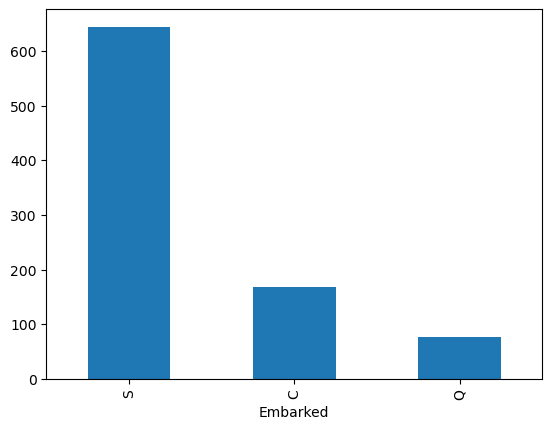

In [25]:
df['Embarked'].value_counts().plot(kind='bar')

### Висновки
З 891 пасажирів вижило 342, 542 - загинули
- На борту було 491 пасажирів з 3-го класу, 216 пасажирів - 2-го класу, 184 пасажира - 1-го класу
- На борту було 577 чоловіків і 314 жінок
- 678 пасажирів було без дітей, 608 пасажирів без подружжя (можна детальніше аналізувати Parch і SibSp бо вони поєднані)
- 644 зайшли на борт в Southampton

## Частотні таблиці двох змінних

### Survived

#### Жінки чи чоловіки?

In [26]:
ct_counts = pd.crosstab(df['Sex'], df['Survived'])
ct_counts['Total'] = ct_counts.sum(axis=1)
#ct_counts.loc['Total'] = ct_counts.sum()
ct_counts

Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577


In [27]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index').round(2)

Survived,0,1
Sex,,
female,0.26,0.74
male,0.81,0.19


74% жінок вижило, 81% чоловіків померло

Це відбулося скоріш за все через те, що спасали жінок більше. Але мені цікаво було б ще тут подивится вік. Дітей теж мали спасати в першу чергу

#### Клас квитків і виживаємість

In [28]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index').round(2)

Survived,0,1
Pclass,,
1,0.37,0.63
2,0.53,0.47
3,0.76,0.24


63% першого класу вижило і 47% другого - вижило

In [29]:
### Родинність

# Аналіз кількісних даних

## Unit 3: Measuring center in quantitative data

### 1. Age
- Обчислити mean, median і mode змінної
- Побудувати гістограму віку.
- Визнач, чи розподіл симетричний чи має асиметрію.
- Вибери, яка міра центру найкраща і чому.

In [18]:
age_df = pd.DataFrame(columns=['Mean', 'Median', 'Mode'])

age_df

age_df['Mean'] = [df["Age"].mean()]
age_df['Median'] = [df["Age"].median()]
age_df['Mode'] = [df["Age"].mode().iloc[0]]

age_df

,Mean,Median,Mode
0,29.699118,28.0,24.0


<Axes: xlabel='Age', ylabel='Count'>

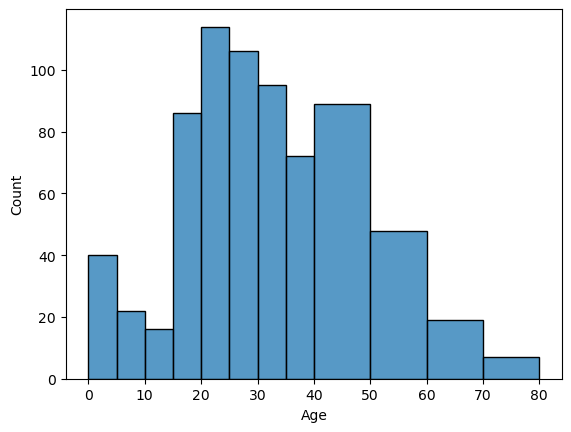

In [17]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
sns.histplot(data=df, x="Age", bins=bins)

Найпоширеніший вік на борту - 24 роки. Найбільше людей на борту було від 20 до 25 років. 

Наш розподіл майже симетричний - медіана і мода мають близькі значення. Але все ж таки розподіл трохи зсунутий в право. Тобто переважна більшість людей - дорослі.

### 2. Fare
- Обчисли mean, median, і mode вартості квитків Fare.
- Побудуй гістограму Fare (з логарифмічною шкалою, якщо є "викиди").
- Чи є дуже великі значення, які тягнуть середнє вгору?
- Чи краще тут використовувати медіану?

In [22]:
fare_df = pd.DataFrame(columns=['Mean', 'Median', 'Mode'])

fare_df['Mean'] = [df["Fare"].mean()]
fare_df['Median'] = [df["Fare"].median()]
fare_df['Mode'] = [df["Fare"].mode().iloc[0]]
fare_df['Max'] = [df["Fare"].max()]
fare_df['Min'] = [df["Fare"].min()]

fare_df

,Mean,Median,Mode,Max,Min
0,32.204208,14.4542,8.05,512.3292,0.0


<Axes: xlabel='Fare', ylabel='Count'>

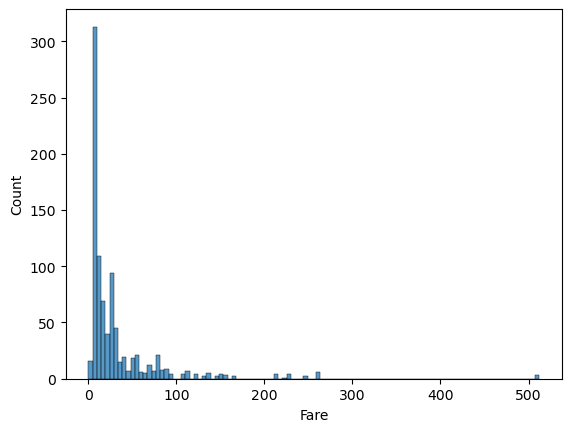

In [21]:
sns.histplot(data=df, x="Fare")

Тут я вирішила знайти квитки зі значеннями 0 та більше 500

In [28]:
df[df['Fare'] == 0][["Name", "Pclass", "Age", "Sex", "Ticket", "Cabin"]]

,Name,Pclass,Age,Sex,Ticket,Cabin
179,"Leonard, Mr. Lionel",3,36.0,male,LINE,NaN
263,"Harrison, Mr. William",1,40.0,male,112059,B94
271,"Tornquist, Mr. William Henry",3,25.0,male,LINE,NaN
277,"Parkes, Mr. Francis ""Frank""",2,NaN,male,239853,NaN
302,"Johnson, Mr. William Cahoone Jr",3,19.0,male,LINE,NaN
413,"Cunningham, Mr. Alfred Fleming",2,NaN,male,239853,NaN
466,"Campbell, Mr. William",2,NaN,male,239853,NaN
481,"Frost, Mr. Anthony Wood ""Archie""",2,NaN,male,239854,NaN
597,"Johnson, Mr. Alfred",3,49.0,male,LINE,NaN
633,"Parr, Mr. William Henry Marsh",1,NaN,male,112052,NaN


Як виявилося ці імена гугляться - більшість з них це інженери які мали виправляти проблеми на Титаніку, так як це був його перший рейс
https://www.encyclopedia-titanica.org/titanic-victim/thomas-andrews.html

І більшість з них не вижило

In [31]:
df[df['Fare'] > 500][["Name", "Pclass", "Age", "Sex", "Ticket", "Cabin", "Fare"]]

,Name,Pclass,Age,Sex,Ticket,Cabin,Fare
258,"Ward, Miss. Anna",1,35.0,female,PC 17755,NaN,512.3292
679,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,male,PC 17755,B51 B53 B55,512.3292
737,"Lesurer, Mr. Gustave J",1,35.0,male,PC 17755,B101,512.3292


In [ ]:
Логарифмічна шкала для гістограми


<Axes: xlabel='Fare', ylabel='Count'>

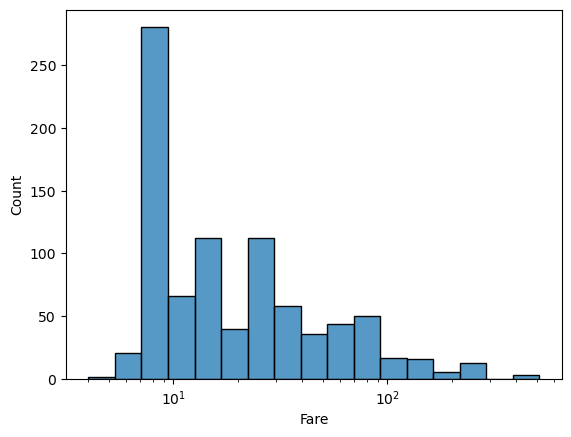

In [46]:
sns.histplot(data=df_fare, x="Fare", log_scale=True)

Тут краще використовувати медіану, бо більшість пасажирів заплатити 10-15 фунтів за квиток. 

- 10^0 = 1  фунт
- 10^1 = 10  фунтів
- 10^2 = 100  фунтів

Були і дуже дорогі квитки - вони і тягнуть криву вправо. Можна сказати що це викид - але пред цим потрібно зрозуміти як виживаємість залежить від ціни квитка або розташування. Можливо саме ці каюти були розташовані в безпечному місці. Або можлво саме цих пасажирів (елітних) спасали в першу чергу. 

### 3. Сегментування + центр
- Виведи mean, median, mode для кожної змінної.
- Побудуй bar chart для частот.
- Що ти можеш сказати про більшість пасажирів — з ким вони подорожували?
- Яка міра центру краще показує типову поведінку?

In [19]:
fare_df = pd.DataFrame(columns=['Mean', 'Median', 'Mode'])

fare_df['Mean'] = [df["Fare"].mean()]
fare_df['Median'] = [df["Fare"].median()]
fare_df['Mode'] = [df["Fare"].mode().iloc[0]]

fare_df

,Mean,Median,Mode
0,32.204208,14.4542,8.05


### 4. Parch / SibSp
- Обчисли mean та median віку окремо для тих, хто вижив (Survived==1) і хто не вижив (Survived==0).
- Чи є різниця?
- Повтори те ж саме для Fare: чи люди, які заплатили більше, мали вищий шанс вижити?

# TODO 
- [X] Parch і SibSp - переглянути що це мається на увазі. Якщо SibSp це зрозуміло що кількість родичів, а от Parch - не зрозуміло чи це тільки діти чи батьки і діти. Чи входять вони в SibSp? Чи правильно я розумію що там чоловік, жінка і кількість дітей?
- [ ] Побудувати граф Parch і SibSp
- [ ] 20% чоловіків вижили - можливо це діти?

# Гіпотези

- [ ] Жінки вижили (але не всі). Які критерії підвищили виживаємість жінці?
- [ ] Чоловіки-діти - вижили
- [ ] Пасажири 1-го класу - вижили
- [ ] Як залежить виживаємість від віку?
- [ ] Ціна і місце: 1 клас вижив? можливо 3-й клас виживаємість залежить від розміщення місця на кораблі https://www.encyclopedia-titanica.org/titanic-deckplans/b-deck.html 